In [59]:
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from random import shuffle

In [60]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

In [61]:
def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)

In [62]:
def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

#Working with sample data

In [63]:
number_of_samples = 6
learning_rate = 0.1
epochs = 100
batch_size = 4
m = -1
c = 1
number_of_batches = number_of_samples//batch_size

In [64]:
x = [0.2,0.4,0.6,0.8,1.0,1.2]
y = [3.4,3.8,4.2,4.6,5.0,5.4]

data = list()

for i in range(6):
  data.append((x[i],y[i]))

print(data)

[(0.2, 3.4), (0.4, 3.8), (0.6, 4.2), (0.8, 4.6), (1.0, 5.0), (1.2, 5.4)]


In [65]:
error_list = []
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data[j*batch_size:]
    else:
      d = data[j*batch_size:(j+1)*batch_size]
    deltam = -1*learning_rate*gradm(d,m,c)
    deltac = -1*learning_rate*gradc(d,m,c)
    m = m + deltam
    c = c + deltac
    error_list.append(error(d,m,c))
  random.shuffle(data)

200
200


Text(0.5, 1.0, 'error graph in case of Mini Batch GD')

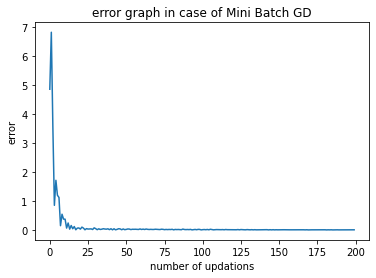

In [66]:
x1 = range(epochs*(number_of_batches+1))
y1 = error_list

print(len(x1))
print(len(y1))
plt.plot(x1,y1)
plt.xlabel("number of updations")
plt.ylabel("error")
plt.title("error graph in case of Mini Batch GD")

Text(0.5, 1.0, 'line which is generated after training')

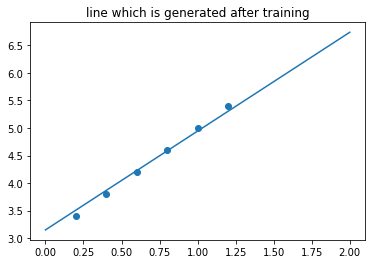

In [67]:
x2 = range(0,3)
y2 = [m*i+c for i in x2]

plt.plot(x2,y2)
plt.scatter(x,y)
plt.title("line which is generated after training")

In [68]:
print("optimal value of m, c :",m,c)

optimal value of m, c : 1.7924033454465178 3.1507356114367346


#Working with realtime data
##Predicting the price of a house based on area of house

In [69]:
data = pd.read_csv("/content/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [70]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [71]:
data.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

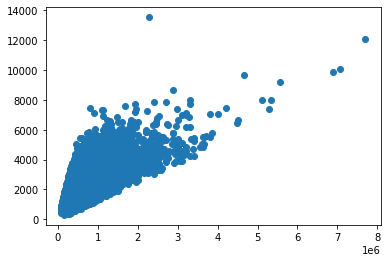

In [73]:
y = data['price']
x = data['sqft_living']

plt.scatter(data['price'],data['sqft_living'])

x = minmax_scale(x)
y = minmax_scale(y)

In [74]:
cleaned_data = [(x[i],y[i]) for i in range(len(x))]

In [75]:
cleaned_data_train, cleaned_data_test = train_test_split(cleaned_data,test_size=0.1)

In [76]:
print(len(cleaned_data_train))
print(len(cleaned_data_test))

19451
2162


In [77]:
epochs = 20
learning_rate = 0.01
batch_size = 500
number_of_samples = len(cleaned_data_train)
number_of_batches = number_of_samples//batch_size
m = 1
c = 1

In [78]:
error_list = []
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = cleaned_data_train[j*batch_size:]
    else:
      d = cleaned_data_train[j*batch_size:(j+1)*batch_size]
    deltam = -1*learning_rate*gradm(d,m,c)
    deltac = -1*learning_rate*gradc(d,m,c)
    m = m + deltam
    c = c + deltac
    err = error(d,m,c)
    print("epoch : {}, batch : {} >> error : {}".format(i,j,err))
    error_list.append(err)
  random.shuffle(cleaned_data_train)

epoch : 0, batch : 0 >> error : 0.5654506722978758
epoch : 0, batch : 1 >> error : 0.5572280692901582
epoch : 0, batch : 2 >> error : 0.5415974768230033
epoch : 0, batch : 3 >> error : 0.531945049641707
epoch : 0, batch : 4 >> error : 0.5217952963246696
epoch : 0, batch : 5 >> error : 0.5138477696526077
epoch : 0, batch : 6 >> error : 0.5046621986715545
epoch : 0, batch : 7 >> error : 0.48639181328851183
epoch : 0, batch : 8 >> error : 0.48070701217089773
epoch : 0, batch : 9 >> error : 0.4725222398155428
epoch : 0, batch : 10 >> error : 0.46253445006565935
epoch : 0, batch : 11 >> error : 0.4542321637582513
epoch : 0, batch : 12 >> error : 0.44354968707523457
epoch : 0, batch : 13 >> error : 0.4343126403692358
epoch : 0, batch : 14 >> error : 0.4231128406615756
epoch : 0, batch : 15 >> error : 0.4174000120076752
epoch : 0, batch : 16 >> error : 0.4057193685853606
epoch : 0, batch : 17 >> error : 0.40176953174972413
epoch : 0, batch : 18 >> error : 0.3923937292921161
epoch : 0, batch :

In [79]:
print(m,c)

0.8434657584968341 -0.05286330129302081


Text(0.5, 1.0, 'error graph in case of Mini Batch GD')

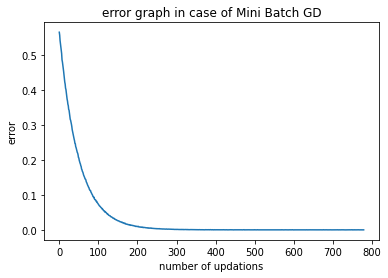

In [80]:
x1 = range(epochs*(number_of_batches+1))
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of updations")
plt.ylabel("error")
plt.title("error graph in case of Mini Batch GD")

Text(0.5, 1.0, 'line which is generated after training')

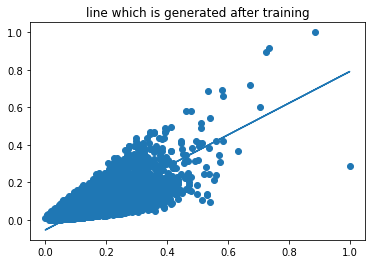

In [81]:
x2 = [a[0] for a in cleaned_data_train]
y2 = [m*i+c for i in x2]

plt.plot(x2,y2)
plt.scatter(x,y)
plt.title("line which is generated after training")

In [82]:
train_error = error(cleaned_data_train,m,c)
test_error = error(cleaned_data_test,m,c)

print("train error is : ",train_error)
print("test error is : ",test_error)

train error is :  0.000894572332975252
test error is :  0.0008685284173257234


In [83]:
input_area = int(input("enter the input area : "))

max_price = 7.700000e+06
min_price = 7.500000e+04

max_area = 13540.000000
min_area = 290.000000

input_area = (input_area - min_area)/(max_area-min_area)
output_price = input_area*m+c

output_price = output_price*(max_price-min_price)+min_price

print("predicted house price is : ",output_price)

enter the input area : 1180
predicted house price is :  103915.02602555709
